In [33]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import dynesty
from dynesty import plotting as dyplot
import pickle
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats

# Min failure case

In [13]:
truth = 3
data = np.random.normal(loc=0, scale=truth, size=500)

In [27]:
def ln_prob(est):
    return np.sum(scipy.stats.norm(loc=0, scale=est).logpdf(data))

def prior_transform(u):
    return truth + (u - 0.5) * 5

In [28]:
sampler = dynesty.NestedSampler(ln_prob, prior_transform, ndim=1, nlive=100)

In [29]:
sampler.run_nested()

iter: 537 | +100 | bound: 3 | nc: 1 | ncall: 4094 | eff(%): 15.559 | loglstar:   -inf < -1280.705 <    inf | logz: -1283.770 +/-  0.219 | dlogz:  0.001 >  0.109                                      

(<Figure size 680x680 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f087f407b00>)

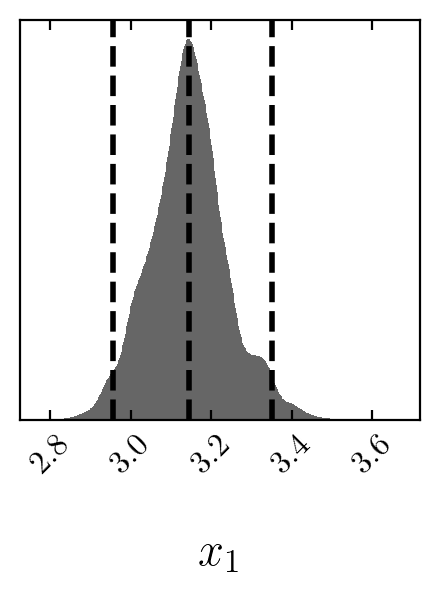

In [30]:
dyplot.cornerplot(sampler.results)

HELLO
> /home/christopher/research/0external_code/dynesty/dynesty/plotting.py(229)runplot()
-> for i in range(4):
(Pdb) c


(<Figure size 3200x3200 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f087c634940>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f087c1afb00>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f087c4e4eb8>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f087c4a2278>], dtype=object))

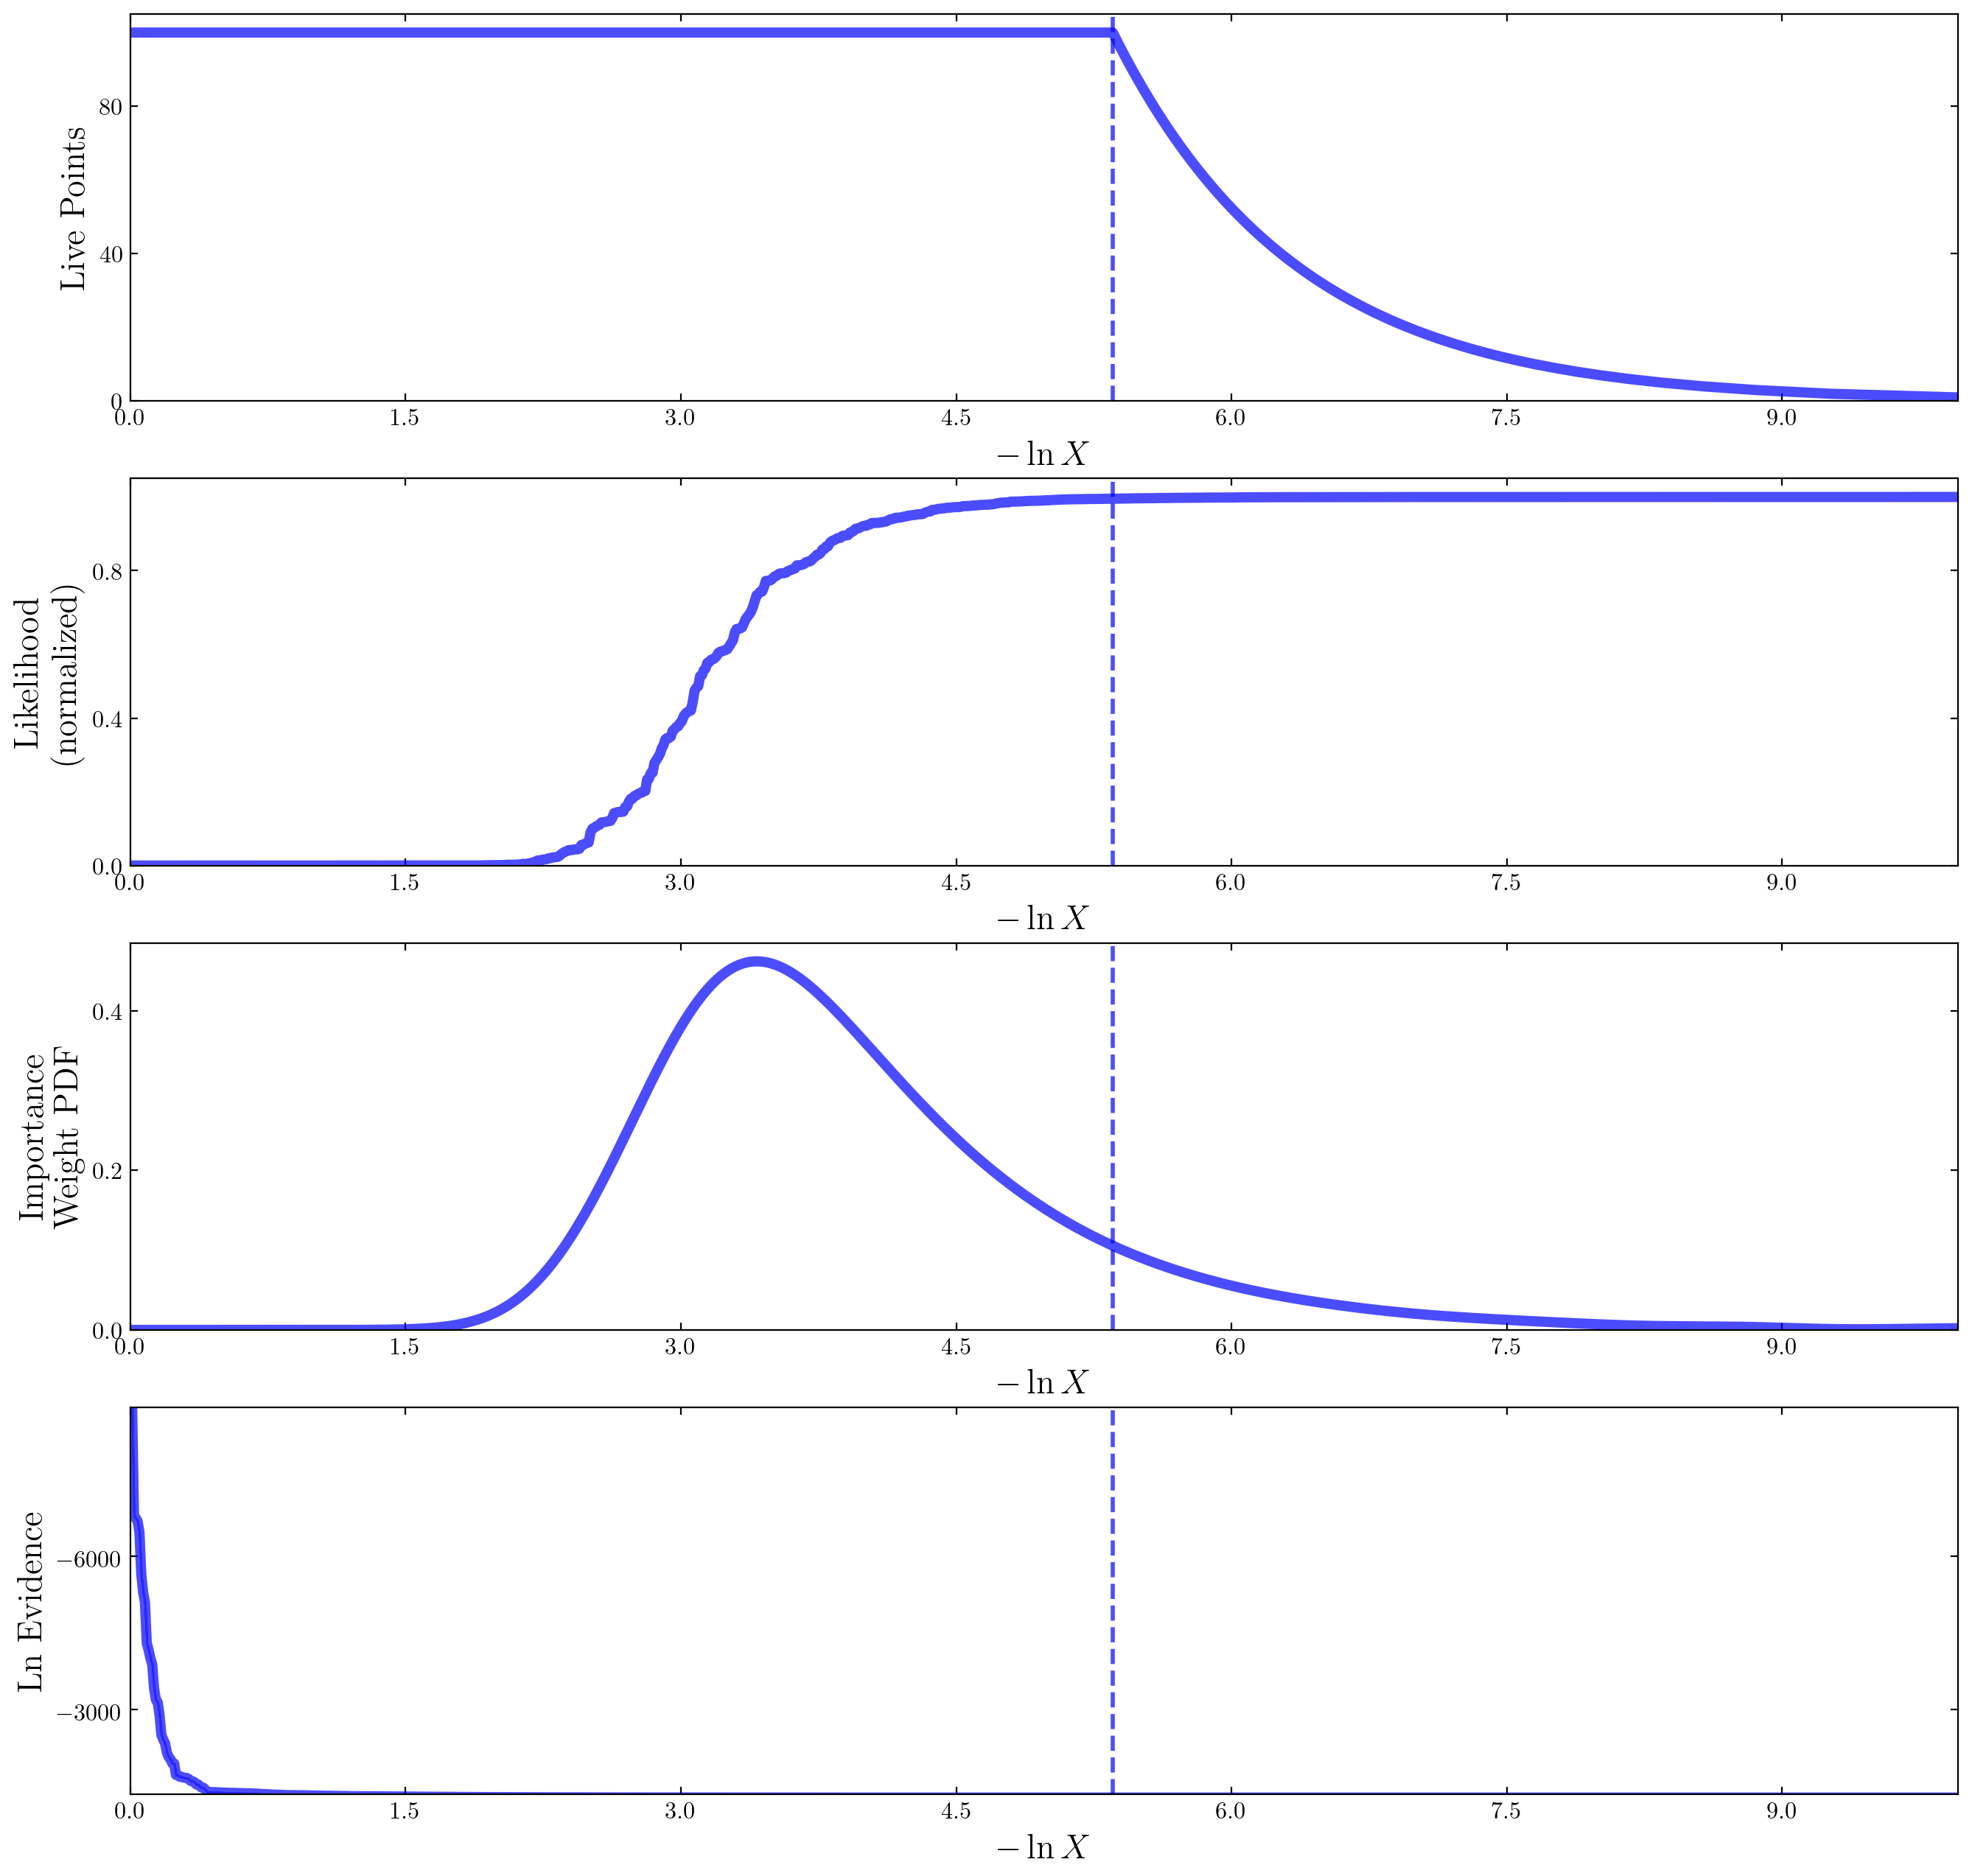

In [41]:
dyplot.runplot(sampler.results)

# Estimate SD on 1d Gaussian

In [3]:
truth = 3
data = np.random.normal(loc=0, scale=truth, size=500)

In [4]:

def ln_prob(est):
    return np.sum(scipy.stats.norm(loc=0, scale=est).logpdf(data))

def prior_transform(u):
    return u* np.exp(2)

In [5]:
inp = np.linspace(2, 4, num=20)
_, ax = plt.subplots()
ax.plot(inp, [ln_prob(i) for i in inp])

RuntimeError: latex was not able to process the following string:
b'$-1340$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2019/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/christopher/.cache/matplotlib/tex.cache/16d1df8f2d666a03c897d1f5c2c7068a
.tex
LaTeX2e <2018-12-01>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {textcomp}^^M
No pages of output.
Transcript written on 16d1df8f2d666a03c897d1f5c2c7068a.log.




<Figure size 1200x800 with 1 Axes>

In [6]:
sampler = dynesty.NestedSampler(ln_prob, prior_transform, ndim=1, nlive=1000)

In [7]:
sampler.run_nested()

iter: 3890 | +1000 | bound: 1 | nc: 1 | ncall: 36528 | eff(%): 13.387 | loglstar:   -inf < -1245.006 <    inf | logz: -1248.522 +/-  0.047 | dlogz:  0.001 >  1.009                                   

[-9.82529643e+07 -4.31410025e+07 -2.16250166e+07 ... -1.24852387e+03 -1.24852318e+03 -1.24852249e+03]


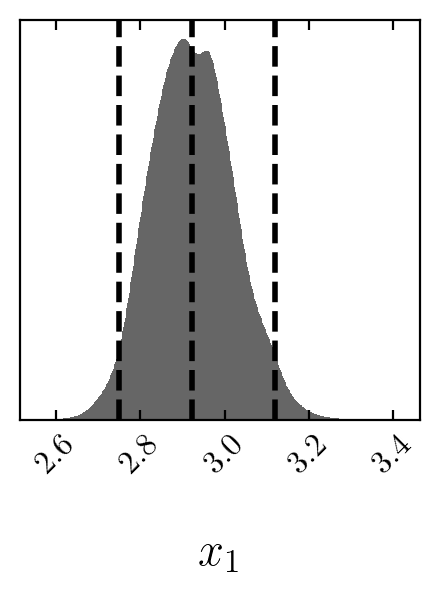

In [10]:
dyplot.cornerplot(sampler.results)
print(sampler.results.logz)
# Prior range of 2.5-3.5: logz = -1281.03070946
# Prior range of 2-4: logz = -1281.77199389 # The 0.7 decrease is roughly ln(2) = 0.69
# Prior range of 0-e^2: logz = -1282.99649 # Roughly an decrease of 2

/home/christopher/research/0external_code/dynesty/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


(<Figure size 3200x3200 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0881c0cf60>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f0881fd1f60>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f0881cab208>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f0881d07438>], dtype=object))

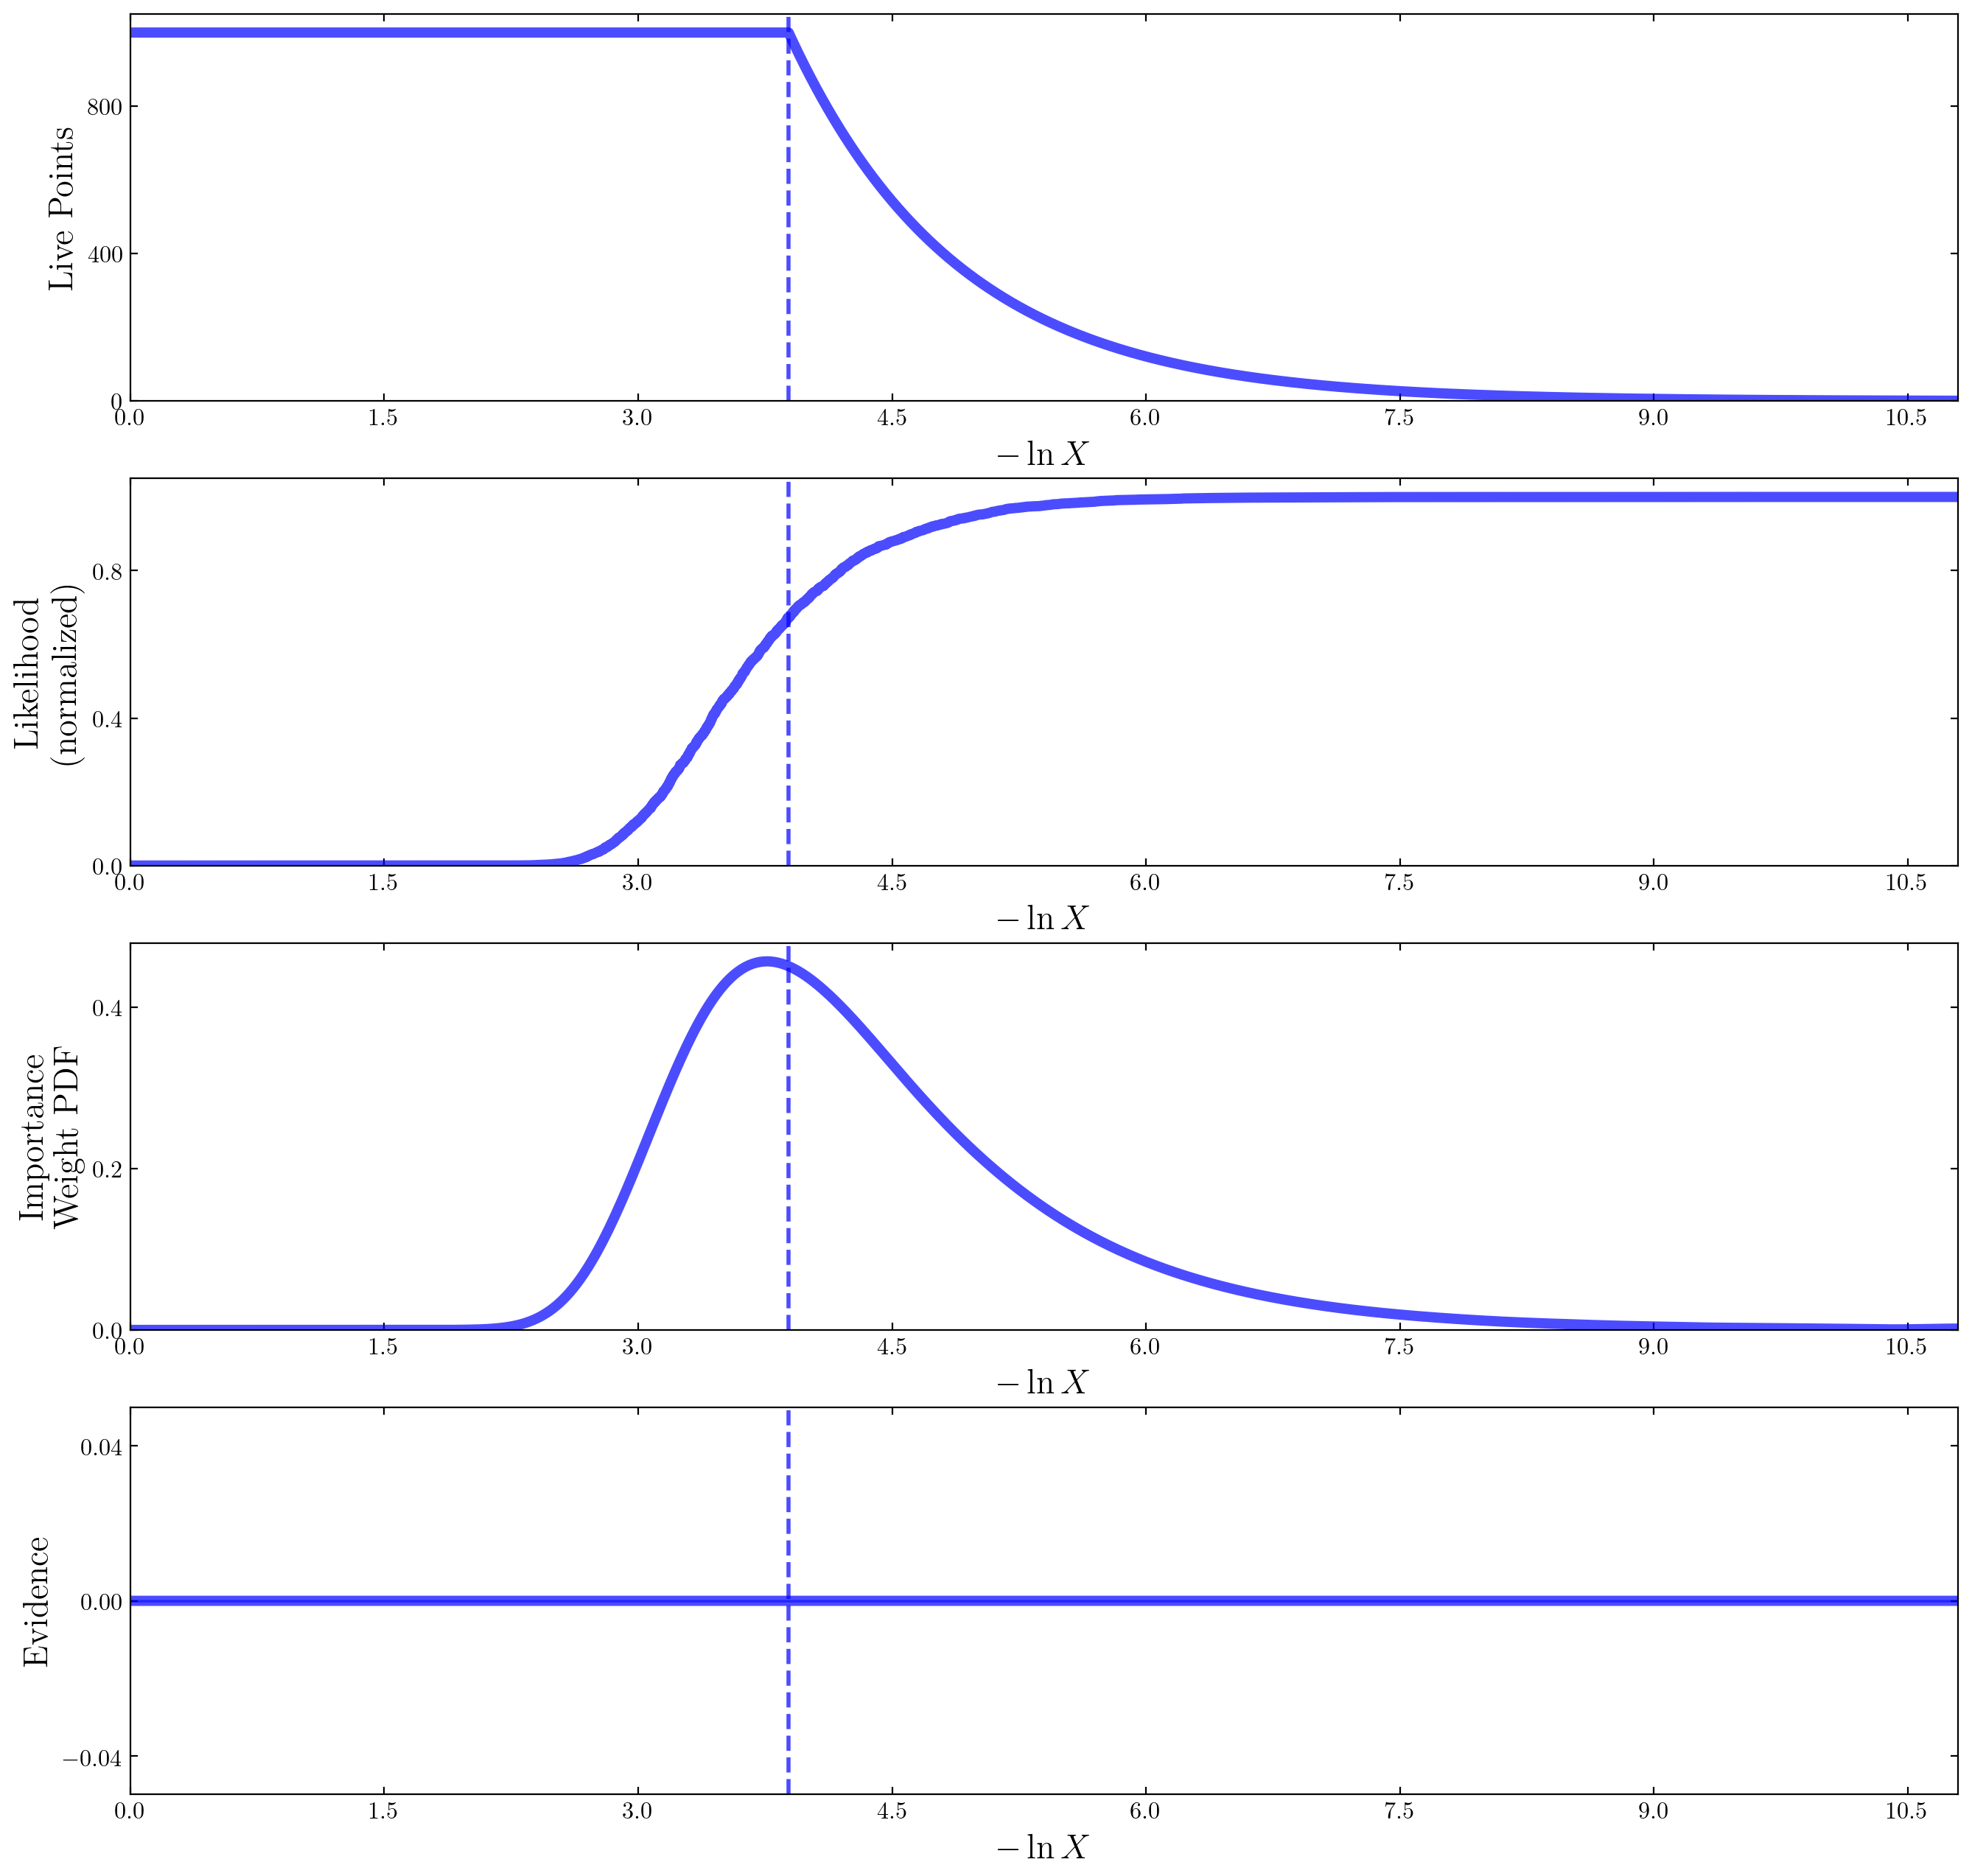

In [11]:
dyplot.runplot(sampler.results)